# Paired two-sample t-test

**date:** 2021-04-17

**aim:** Perform a paired **t-test** using two samples of data.

**reference:** Computer book B, Activity 25 *(amended)*

**data:** `darwn.csv`

**description:** Heights of fifteen pairs of plants of the species *Zea mays*.
Each plant had parents grown from the same seed, where one plant in each pair was the offspring of a cross-fertilisation, the other of a self-fertilisation.

**module:** `scipy.stats.ttest_1samp`

**note:** This is the same test at **b-10** but instead of taking the difference, we instead use both data in the test.

## Setup

In [1]:
from setup import load
from scipy.stats import probplot, ttest_rel
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import the data
darwin = load.darwin()

In [3]:
# assign local vars
x = darwin["Cross"]
s = darwin["Self"]

## Hypotheses

Charles Darwin, one of the people who introduced the theory of evolution, measured the heights of fifteen pairs of plants of the species Zea mays, that is, maize or corn. Each plant had parents grown from the same seed – one plant in each pair was the offspring of a cross-fertilisation, the other of a self-fertilisation.
The key feature of these data is that the two height measurements within each pair are not independent, since the two plants within a pair are genetically related.

Let the hypotheses be

$$
H_{0} : \mu_{X} = \mu_{S}, \> \mu_{X} > \mu_{S}
$$

where $\mu_{X}, \> \mu_{S}$ are the underlying population means of the heights cross-fertilised plants and self-fertilised plants, respectively.

## Results

### Preview the data

In [4]:
darwin.head()

,Cross,Self
0,188,139
1,96,163
2,168,160
3,176,160
4,153,147


### Summarise the data

In [5]:
darwin.describe()

,Cross,Self
count,15.000000,15.000000
mean,161.533333,140.600000
std,28.935561,16.413409
min,96.000000,102.000000
25%,158.000000,131.000000
50%,172.000000,144.000000
75%,177.000000,149.000000
max,188.000000,163.000000


### Visualise the data

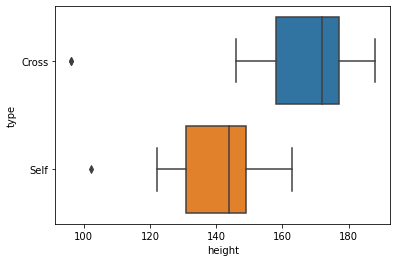

In [6]:
ax = sns.boxplot(x="value", y="variable", data=darwin.melt())
ax.set(xlabel="height", ylabel="type")
plt.show()

### Check assumptions

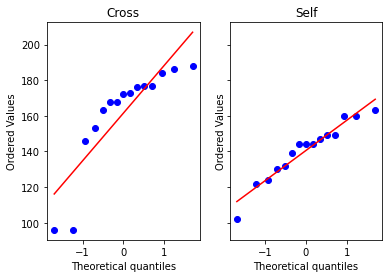

In [7]:
# check normality using normal probability plots
f, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, sharey=True)
probplot(x=x, plot=ax1)
probplot(x=s, plot=ax2)
ax1.set_title("Cross")
ax2.set_title("Self")
plt.show()

### Calculations

In [8]:
ttest_rel(a=x, b=s, alternative="greater")

Ttest_relResult(statistic=2.1479874613311205, pvalue=0.024851472010900447)